### Excercise 6 - COMP 4431
#### Group Name: Broken Toes; Members: Emma Bright, Duncan Ferguson, Mike Santoro
#### Submission by: Mike Santoro

##### Part 1:

For the decision tree in the book in example 8.2, during class I just showed how to calculate the root node Gain(A) values for A in {income,age,student,credit}.   Also found here: exercise6A_start.pdf Download exercise6A_start.pdf

Hand calculate the Gain(A) values, for each of the 3 attributes, for the left  subtree split (i.e. for the tuples 1,2,8,9 and 11 which are in the "youth" category after the first split.

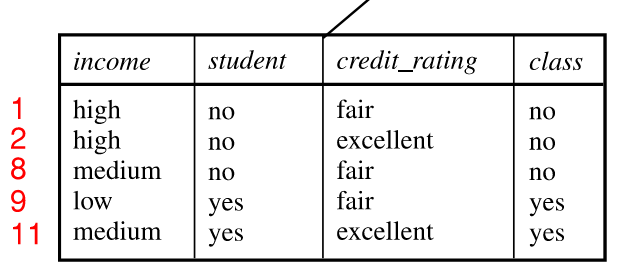

##### Income Gain
$Gain(income) = Info(D) - Info_{income}(D)$

Where

$$Info(D) = -\sum_{i=1}^{m}p_i\log_2(p_i)$$

and

$$Info_{income}(D) = \sum_{j=1}^{v}\frac{|D_j|}{|D|}\times Info(D_j)$$

First we can calculate the $Info(D)$ term, which ends up being as follows.

$$Info(D) = -\frac{2}{5}\log_2\left(\frac{2}{5}\right) -\frac{3}{5}\log_2\left(\frac{3}{5}\right)$$

In the case of income we find the following:

High: 1->N, 2->N

Medium: 8->N, 11->Y

Low: 9->Y




In [4]:
import math

Info_D = -(2/5)*math.log2(2/5)-(3/5)*math.log2(3/5)
Info_D

0.9709505944546686

In the case of income we find the following:

High: 1->N, 2->N

Medium: 8->N, 11->Y

Low: 9->Y

With this information we can now calculate the $Info_{income}(D)$ term, since $\log_2(1) = 0$ and $0$ times anything is equal to $0$, will give us following:

$$Info_{income}(D) = 0 + \frac{2}{5}\left(-\frac{1}{2}\log_2\left(\frac{1}{2}\right)-\frac{1}{2}\log_2\left(\frac{1}{2}\right)\right) + 0$$

In [5]:
Info_income_D = (2/5)*(-(1/2)*math.log2(1/2)-(1/2)*math.log2(1/2))
Info_income_D

0.4

Now we have suffiecient information to calculate $Gain(income)$ which will be as follows:

$$Gain(income) = Info(D) - Info_{income}(D)$$

In [6]:
Gain_income = Info_D - Info_income_D
Gain_income

0.5709505944546686

##### Student Gain
Since we have already calculated $Info(D)$ we only need to calculate $Info_{student}(D)$ since we are finding $Gain(student) = Info(D) - Info_{student}(D)$

The table of values is as follows:

Yes: 9->Y, 11->Y

No: 1->N, 2->N, 8->N

In [12]:
Info_student_D = 0
Info_student_D

0

In [13]:
Gain_student = Info_D - Info_gain_D
Gain_student

0.9709505944546686

##### Credit Gain
Since we have already calculated $Info(D)$ we only need to calculate $Info_{credit}(D)$ since we are finding $Gain(credit) = Info(D) - Info_{credit}(D)$

The table of values is as follows:

Fair: 1->N, 8->N, 9->Y

Excellent: 2->N, 11->Y

$$Info_{credit}(D) = \frac{3}{5}\left(-\frac{1}{3}\log_2\left(\frac{1}{3}\right)-\frac{2}{3}\log_2\left(\frac{2}{3}\right)\right) + \frac{2}{5}\left(-\frac{1}{2}\log_2\left(\frac{1}{2}\right)-\frac{1}{2}\log_2\left(\frac{1}{2}\right)\right)$$

In [16]:
Info_credit_D = (3/5)*(-(1/3)*math.log2(1/3)-(2/3)*math.log2(2/3))+(2/5)*(-(1/2)*math.log2(1/2)-(1/2)*math.log2(1/2))
Info_credit_D

0.9509775004326937

In [17]:
Gain_credit = Info_D - Info_credit_D
Gain_credit

0.01997309402197489

##### Part 2:
You are to create a set of 8..12 training tuples, including the classification of each, and then run through sklearn to build a decision and print out the resultant decision tree.  You should craft your tuples and classification array such that the decision tree has at least 3 levels (including the root) and explain which tuples end up in which leaf level node.  Feel free to draw a picture or use the graph viewer if you prefer.

The problem is to classify college student applicants based on likelihood of finishing in 6 years as "yes" or "no".

Assume a tuple has the following information:

[GPA, RANK, WORKED]

where:

GPA = high school grade point average

RANK = rank in class expressed as a decimal percentile (e.g. 0.99 means top 99%)

WORKED =  { 0 , 1} where 0 means did not work a job in HS, 1 means did

For example:

[3.4,0.85,1] means an applicant has a 3.4 gpa, was in the top 85 percentile, and worked while in high school.

In [53]:
import random
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import export_text

In [36]:
def create_student(num):
    """This Function goes through and creates"""
    random.seed(50)

    # Creating a list of 12 Random GPAS
    GPA = [round(random.uniform(1, 4), 2) for _ in range(num)]  # Creating List of Random GPA

    # Setting up quasi random Ranking
    RANK = []
    for grade in GPA:
        if grade > 3.5:
            RANK.append(round(random.uniform(.9, 1), 2))
        elif grade > 3:
            RANK.append(round(random.uniform(.8, .9), 2))
        elif grade > 2.5:
            RANK.append(round(random.uniform(.7, .8), 2))
        elif grade > 2:
            RANK.append(round(random.uniform(.6, .7), 2))
        else:
            RANK.append(round(random.uniform(0, .6), 2))

    # Setting up Random Work 0 did not work 1 did, Scalling it toward working have lower GPA
    WORKED = []
    for num in enumerate(GPA):
        if num[1] > 2:
            rand_work = random.randint(0, 60)
            if rand_work > 50:
                WORKED.append(1)
            else:
                WORKED.append(0)
        else:
            rand_work = random.randint(30, 100)
            if rand_work > 50:
                WORKED.append(1)
            else:
                WORKED.append(0)

    #  Setting up if they Graduated College
    for num in enumerate(GPA):
        if num[1] > 2:
            rand_work = random.randint(0, 60)
            if rand_work > 50:
                WORKED.append(1)
            else:
                WORKED.append(0)
        else:
            rand_work = random.randint(30, 100)
            if rand_work > 50:
                WORKED.append(1)
            else:
                WORKED.append(0)

    # List of lists
    list_o_lists = []
    for num in enumerate(GPA):
        list_o_lists.append([GPA[num[0]],RANK[num[0]], WORKED[num[0]]])
        
    for person in enumerate(list_o_lists):
        if sum(person[1]) > 3:
            list_o_lists[person[0]].append(1)
        else:
            list_o_lists[person[0]].append(0)

    return list_o_lists

In [55]:
data = pd.DataFrame(create_student(12), columns=['GPA', 'Rank', 'Worked', '>6Years'])
data.shape

(12, 4)

In [56]:
labels = np.array(data)[:,-1:]
labels

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]])

In [57]:
features = np.array(data)[:,:3]
features

array([[2.49, 0.7 , 0.  ],
       [1.8 , 0.19, 1.  ],
       [2.91, 0.72, 0.  ],
       [1.73, 0.58, 1.  ],
       [2.42, 0.63, 0.  ],
       [3.91, 0.96, 0.  ],
       [1.26, 0.36, 1.  ],
       [1.95, 0.38, 0.  ],
       [3.03, 0.89, 0.  ],
       [1.26, 0.58, 1.  ],
       [1.46, 0.42, 1.  ],
       [3.48, 0.88, 1.  ]])

In [58]:
# clf2 = tree.DecisionTreeClassifier()  # if not criterion supplied uses Gini
clf2 = tree.DecisionTreeClassifier(criterion="entropy")
clf2 = clf2.fit(features,labels)

print(type(clf2))
print(clf2)

# Simple/silly test by looking up  the first 6 tuples
# since classifications = [0,0,1,1,1,0,1,0,1,1,1,1,1,0], predict should be 0,0,1,1,1,0
# i.e, by definition they should be classified correctly since used to build the tree!
print("\nNow 'predicting class' of the first 6 elements of the training data.")
testData = [[4.0,0.9,1], [1.0,.1,0]]
foo = clf2.predict_proba( testData )
print("test data = " + str(testData))
print("data are classified as:")
print(foo)

# print out the text version of the tree structure
treeStruct = export_text(clf2)
print("\nNow printing export_text(clf2)")
print(treeStruct)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(criterion='entropy')

Now 'predicting class' of the first 6 elements of the training data.
test data = [[4.0, 0.9, 1], [1.0, 0.1, 0]]
data are classified as:
[[0. 1.]
 [1. 0.]]

Now printing export_text(clf2)
|--- feature_0 <= 2.19
|   |--- feature_1 <= 0.50
|   |   |--- class: 0.0
|   |--- feature_1 >  0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 0.0
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 1.0
|--- feature_0 >  2.19
|   |--- class: 1.0



clf2.apply( features ):
[6 2 6 5 6 6 2 2 6 4 2 6]

Now printing each tuple with the decision tree node it ends up in:
[2.49 0.7  0.  ],6
[1.8  0.19 1.  ],2
[2.91 0.72 0.  ],6
[1.73 0.58 1.  ],5
[2.42 0.63 0.  ],6
[3.91 0.96 0.  ],6
[1.26 0.36 1.  ],2
[1.95 0.38 0.  ],2
[3.03 0.89 0.  ],6
[1.26 0.58 1.  ],4
[1.46 0.42 1.  ],2
[3.48 0.88 1.  ],6


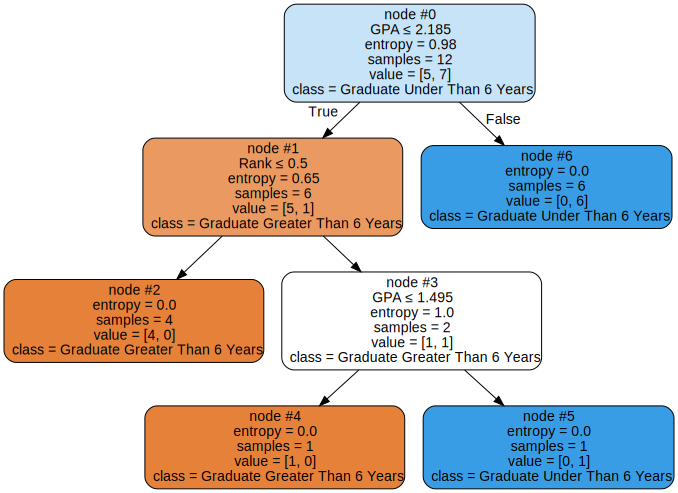

In [65]:
# which leaf level nodes did the tuples get assigned to
      
foo = clf2.apply( features )   # passing in full list of training tuples
print("clf2.apply( features ):") 
print(foo)
# now print out line by line as pair:  tuple, which leaf node 
print("\nNow printing each tuple with the decision tree node it ends up in:")
for i in range(len(foo)):
    print(str(features[i]) + "," + str(foo[i])) 


# likely need to install first:
# pip install graphviz
# https://graphviz.readthedocs.io/en/stable/manual.html

from sklearn.tree import export_graphviz
import graphviz
# NOTE - adding in node_ids and class_names as options to make tree viz more robust
dot_data = tree.export_graphviz(clf2,
                                node_ids="true",
                                feature_names=data.columns.to_list()[:3],
                                class_names=('Graduate Greater Than 6 Years','Graduate Under Than 6 Years'),
                                out_file=None,
                                filled=True,
                                rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

graph

In [64]:
data.columns.to_list()

['GPA', 'Rank', 'Worked', '>6Years']